# Flights Data Set PreProcess
### imports and loading the main dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from datetime import timedelta
from datetime import datetime


#from sklearn.linear_model import LinearRegression
#from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split
#from sklearn import metrics
%matplotlib inline
%config IPCompleter.greedy=True
flight = pd.read_csv("C:\\Users\\MAHE\\Desktop\\data_sets\\Rawflight.csv")

### Functions

In [2]:
def Avgprice_var(data,n,p=0):
    fare = []
    days = []
    j = data
    for i in range(0,n):
        dday = j.loc[j['Days_fly'] == i] #takes the data where days to dept is equal to i 
        avg_fare = dday['Total_fare'].mean()
        fare.append(int(avg_fare))
        days.append(str(((datetime.now()-timedelta(days = p)) + timedelta(days = i)).day)+"-"+str(((datetime.now()-timedelta(days = p)) + timedelta(days = i)).month))
    """"plt.figure(figsize=(20,10))
    plt.plot(days,fare)
    plt.title("Date v/s Fare")
    plt.xticks(rotation=90)
    plt.show()"""
    return days,fare
        
def Minprice_var(data,n):
    fare = []
    days = []
    j = data
    for i in range(0,n):
        dday = j.loc[j['Days_fly'] == i]
        avg_fare = min(dday['Total_fare'])
        fare.append(int(avg_fare))
        days.append(str((datetime.now() + timedelta(days = i)).day)+"-"+str((datetime.now() + timedelta(days = i)).month))
    """"plt.figure(figsize=(20,10))
    plt.plot(days,fare)
    plt.title("Date v/s Fare")
    plt.xticks(rotation=90)
    plt.show()"""
    return days,fare

    plt.show()
def flights_per_airline(data):
    data.airline.value_counts().plot(kind = 'bar')

def compare_fare(sd,dest,al,n=50):#sd=search_date,dest = destination,al =airline,n=#of days
    df=flight.loc[(flight['Search_Date'] == sd)& (flight['destination']==dest)& (flight['airline']== al)]
    fare=[]
    days=[]
    diff = datetime.datetime.now().date() - datetime.datetime.strptime(sd,'%Y-%m-%d').date()
    diff = int(str(diff).split()[0]) 
    for i in range(0,n):
        dday = df.loc[df['Days_fly'] == i] #takes the data where days to dept is equal to i 
        avg_fare = dday['Total_fare'].mean()
        fare.append(int(avg_fare))
        days.append(str(((datetime.datetime.now()-datetime.timedelta(days = diff)) + datetime.timedelta(days = i)).day)+"-"+str(((datetime.datetime.now()-datetime.timedelta(days = diff)) + datetime.timedelta(days = i)).month))
    df2 = flight.loc[(flight['destination']==dest)& (flight['airline']== al)]
    d1,f1 = Avgprice_var(df2,n-diff)
    
    plt.figure(figsize=(20,10))
    plt.plot(days,fare,'red')
    plt.plot(d1,f1,'blue')

    plt.xticks(rotation=90)
    plt.legend([str(diff)+'days ago','today'])
    plt.show()
    
def rel(data):
    corel = data.corr().index
    plt.figure(figsize = (10,10))
    corell=sns.heatmap(data[corel].corr(),annot = True,cmap = 'RdYlGn')
    
    

## PreProcess and making sub data set

<p><b>drop class as all are E<br>
drop/Ignore Origin as all are Del.Might be useful for future development when more than 1 Org<br>
drop/Ignore Stop1 amd Stop2 as no of stops matter more.Might be required for future improvement

In [3]:
mins =[]
for t in flight.duration:
    m = (int(t.split()[0].split('h')[0])*60) + (int(t.split()[1].split('m')[0]))
    mins.append(m)
flight.replace(["BOM","HYD","NAG","PNQ"],[1,2,3,4],inplace = True)
flight['duration'] = mins
flight['airline']=flight.airline.astype('category')
flight['Departure_Date'] = pd.to_datetime(flight.Departure_Date,dayfirst =True)
flight['Search_Date'] = pd.to_datetime(flight.Search_Date,dayfirst =True)
flight['Day_Name'] = flight.Departure_Date.dt.weekday
flight['Month'] = flight.Departure_Date.dt.month
flight.drop_duplicates(inplace = True)
flight.replace(to_replace = 'AirAsia India',value ='AirAsia',inplace =True)
flight.drop('Unnamed: 0',axis = 1,inplace =True)
Indigo = flight.loc[flight['airline'] == 'IndiGo']
GoAir = flight.loc[flight['airline'] == 'GoAir']
AirAsia = flight.loc[(flight['airline'] == 'AirAsia')]
SpiceJet = flight.loc[flight['airline'] == 'Spicejet']
Vistara = flight.loc[flight['airline'] == 'Vistara']
AirIndia = flight.loc[flight['airline'] == 'Air India']
Bom = flight.loc[flight['destination'] == 1]
Hyd = flight.loc[flight['destination'] == 2]
Pnq= flight.loc[flight['destination'] == 4]
Nag = flight.loc[flight['destination'] == 3]
INBom = Bom[Bom.airline == 'IndiGo']
INHyd = Hyd[Hyd.airline == 'IndiGo']
INPnq = Pnq[Pnq.airline == 'IndiGo']
INNag = Nag[Nag.airline == 'IndiGo']
GABom = Bom[Bom.airline == 'GoAir']
GAHyd = Hyd[Hyd.airline == 'GoAir']
GAPnq = Pnq[Pnq.airline == 'GoAir']
GANag = Nag[Nag.airline == 'GoAir']
AABom = Bom[Bom.airline == 'AirAsia']
AAHyd = Hyd[Hyd.airline == 'AirAsia']
AAPnq = Pnq[Pnq.airline == 'AirAsia']
SJBom = Bom[Bom.airline == 'Spicejet']
SJHyd = Hyd[Hyd.airline == 'Spicejet']
SJPnq = Pnq[Pnq.airline == 'Spicejet']
VBom = Bom[Bom.airline == 'Vistara']
VHyd = Hyd[Hyd.airline == 'Vistara']
VPnq = Pnq[Pnq.airline == 'Vistara']
AIBom = Bom[Bom.airline == 'Air India']
AIHyd = Hyd[Hyd.airline == 'Air India']
AIPnq = Pnq[Pnq.airline == 'Air India']
AINag = Nag[Nag.airline == 'Air India']

In [4]:
tofday = []
for i in flight['deptime']:
    j=int(i.split(':')[0])
    if(j >=0 | j<6):
        tofday.append(1)
    elif(j >=6 | j<12):
        tofday.append(2)
    elif(j>=12 | j< 18):
        tofday.append(3)
    else:
        tofday.append(4)
flight['tcat'] = tofday
flight

,Search_Date,Departure_Date,Days_fly,origin,destination,deptime,arrtime,flightno,airline,Total_fare,seats_avail,seatingclass,duration,stops,stop1,stop2,Day_Name,Month,tcat
0,2019-08-07,2019-08-07,0,DEL,1,16:40,4:40,10,Air India,5771,9,E,720,1,AMD,NaN,2,8,4
1,2019-08-07,2019-08-08,1,DEL,1,16:40,6:00,10,Air India,5771,9,E,800,1,AMD,NaN,3,8,4
2,2019-08-07,2019-08-09,2,DEL,1,16:40,4:40,10,Air India,6821,9,E,720,1,AMD,NaN,4,8,4
3,2019-08-07,2019-08-09,2,DEL,1,16:40,8:35,10,Air India,7451,9,E,955,1,AMD,NaN,4,8,4
4,2019-08-07,2019-08-10,3,DEL,1,16:40,4:40,10,Air India,5666,9,E,720,1,AMD,NaN,5,8,4
5,2019-08-07,2019-08-10,3,DEL,1,16:40,8:35,10,Air India,5981,9,E,955,1,AMD,NaN,5,8,4
6,2019-08-07,2019-08-11,4,DEL,1,16:40,4:40,10,Air India,5666,9,E,720,1,AMD,NaN,6,8,4
7,2019-08-07,2019-08-11,4,DEL,1,16:40,8:35,10,Air India,5876,9,E,955,1,AMD,NaN,6,8,4
8,2019-08-07,2019-08-12,5,DEL,1,16:40,8:35,10,Air India,5141,9999,E,955,1,AMD,NaN,0,8,4
9,2019-08-07,2019-08-12,5,DEL,1,16:40,4:40,10,Air India,5141,9999,E,720,1,AMD,NaN,0,8,4


In [22]:
flight.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096269 entries, 0 to 1096268
Data columns (total 18 columns):
Search_Date       1096269 non-null datetime64[ns]
Departure_Date    1096269 non-null datetime64[ns]
Days_fly          1096269 non-null int64
origin            1096269 non-null object
destination       1096269 non-null int64
deptime           1096269 non-null object
arrtime           1096269 non-null object
flightno          1096269 non-null int64
airline           1096269 non-null category
Total_fare        1096269 non-null int64
seats_avail       1096269 non-null int64
seatingclass      1096269 non-null object
duration          1096269 non-null int64
stops             1096269 non-null int64
stop1             586145 non-null object
stop2             13466 non-null object
Day_Name          1096269 non-null int64
Month             1096269 non-null int64
dtypes: category(1), datetime64[ns](2), int64(9), object(6)
memory usage: 431.7 MB


In [5]:
flight.dtypes

Search_Date       datetime64[ns]
Departure_Date    datetime64[ns]
Days_fly                   int64
origin                    object
destination                int64
deptime                   object
arrtime                   object
flightno                   int64
airline                 category
Total_fare                 int64
seats_avail                int64
seatingclass              object
duration                   int64
stops                      int64
stop1                     object
stop2                     object
Day_Name                   int64
Month                      int64
tcat                       int64
dtype: object

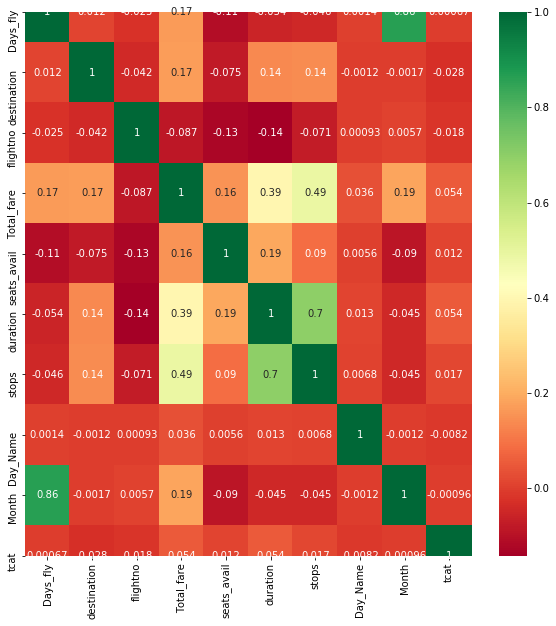

In [6]:
rel(flight)
#print(flight.groupby(flight.airline).seats_avail.value_counts())
#GoAir.seats_avail.value_counts()

<b>Vistara,SpiceJet</b> and some of <b>AirIndia</b> flights have single value of seats available which is incorrect<br>
<b> Can Indigo AirAsia and GoAir help us to predict/approx the values of seats? </b>

In [28]:
flight.tail()

,Search_Date,Departure_Date,Days_fly,origin,destination,deptime,arrtime,flightno,airline,Total_fare,seats_avail,seatingclass,duration,stops,stop1,stop2,Day_Name,Month
1096264,2019-09-22,2019-12-23,92,DEL,3,07:00,07:20,887,Air India,9919,9,E,1460,1,1,NaN,0,12
1096265,2019-09-22,2019-12-23,92,DEL,3,09:00,20:35,678,Air India,9919,9,E,695,1,1,NaN,0,12
1096266,2019-09-22,2019-12-23,92,DEL,3,08:00,20:35,665,Air India,9919,6,E,755,1,1,NaN,0,12
1096267,2019-09-22,2019-12-23,92,DEL,3,07:00,20:35,887,Air India,9919,9,E,815,1,1,NaN,0,12
1096268,2019-09-22,2019-12-23,92,DEL,3,14:15,20:35,637,Air India,11200,3,E,380,2,IDR,1,0,12


### Analysing the Seats relation of Indigo GoAir and Air Asia

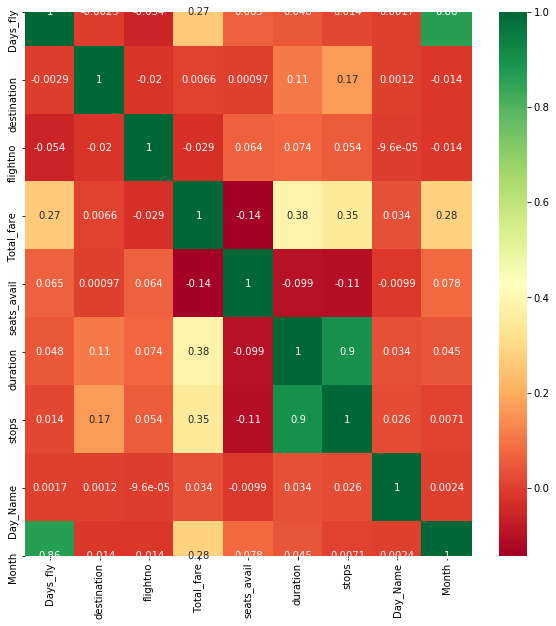

In [25]:
rel(Indigo)

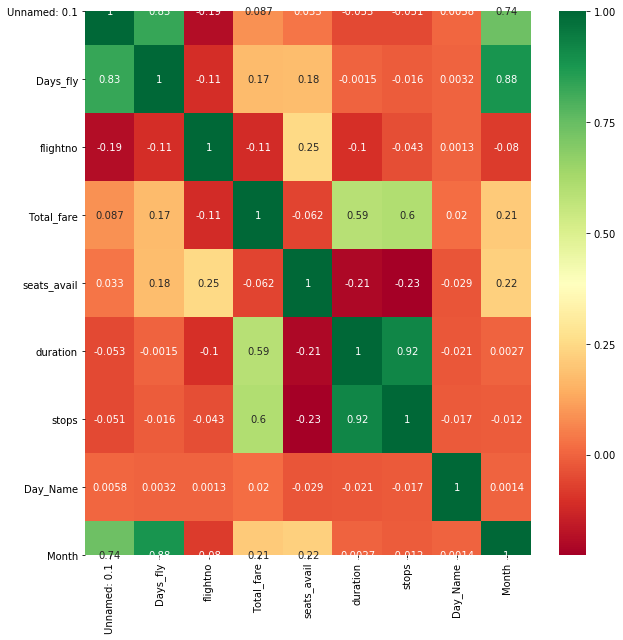

In [16]:
rel(GoAir)

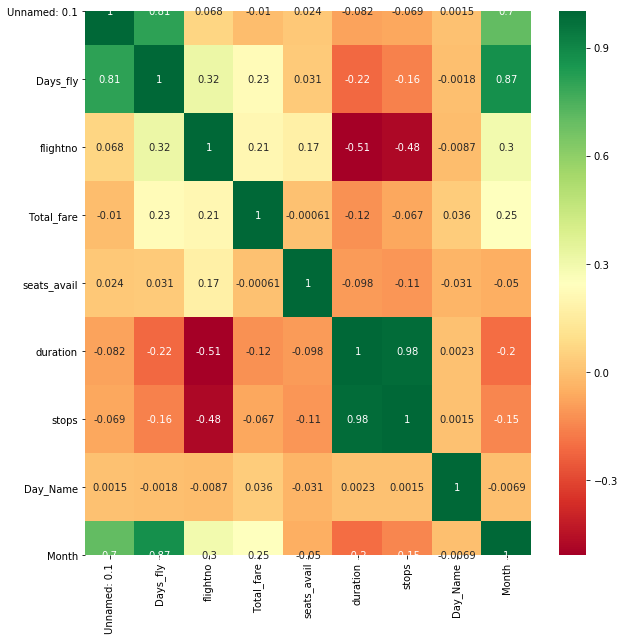

In [15]:
rel(AirAsia)

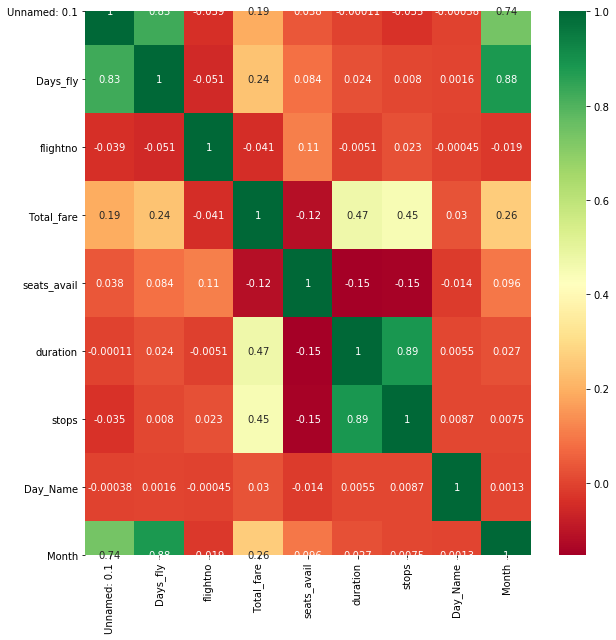

In [14]:
AAGAIN = flight.loc[(flight.airline == 'AirAsia')|(flight.airline == 'GoAir')|(flight.airline == 'IndiGo')]
rel(AAGAIN)

### Days to fly, Total fare are two columns that show strong connection to seats

## Seats vs days to dept visualization

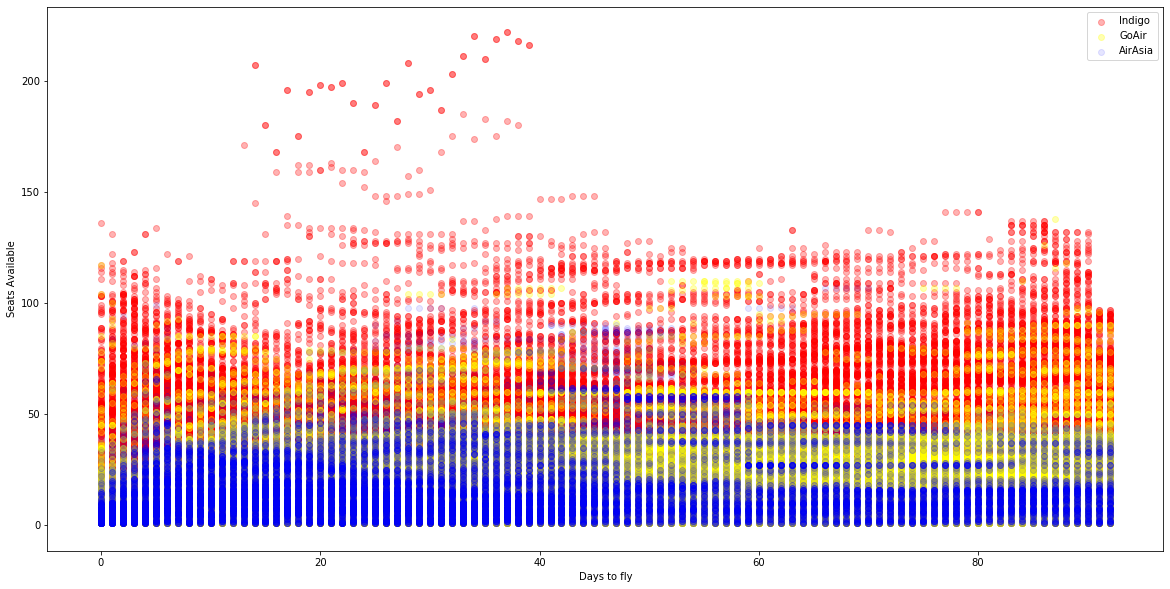

In [18]:
plt.figure(figsize=(20,10))
plt.scatter(Indigo.Days_fly[:],Indigo.seats_avail[:],color = 'red',alpha = 0.3)
plt.scatter(GoAir.Days_fly[:],GoAir.seats_avail[:],color = 'yellow',alpha = 0.3)
plt.scatter(AirAsia.Days_fly[:],AirAsia.seats_avail[:],color = 'blue',alpha = 0.1)
#plt.scatter(AirIndia.Days_fly[:],AirIndia.seats_avail[:],color = 'blue',alpha = 0.1)
plt.legend(['Indigo','GoAir','AirAsia'])
plt.xlabel('Days to fly')
plt.ylabel('Seats Available')
plt.show()

### The trend observed seems to be constant linear line

## Seats vs Fare

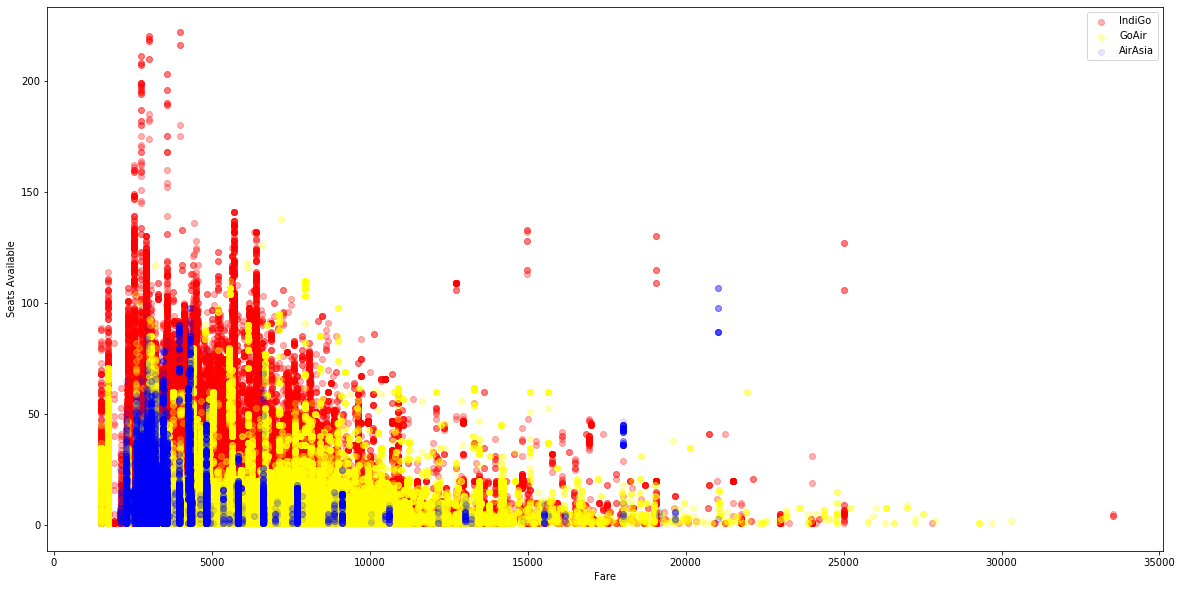

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(Indigo.Total_fare[:],Indigo.seats_avail[:],color = 'red',alpha = 0.3)
plt.scatter(GoAir.Total_fare[:],GoAir.seats_avail[:],color = 'yellow',alpha = 0.3)
plt.scatter(AirAsia.Total_fare[:],AirAsia.seats_avail[:],color = 'blue',alpha = 0.1)
plt.legend(['IndiGo','GoAir','AirAsia'])
#plt.scatter(AirIndia.Total_fare[:],AirIndia.seats_avail[:],color = 'blue',alpha = 0.1)
plt.xlabel('Fare')
plt.ylabel('Seats Available')
plt.show()

### The trend observed is exponentially decreasing and is valid for all the airlines which make it a better option for predicting no. of available seats
<br>
<hr>

## Problem: Every airline gave a somewhat different result and hence it is difficult to generalise the trend for every airline and predict. <br>
## Solution: Either the column seats_available can be dropped as the missing or inconsistent values cant be predicted or filled, or the dataset can be normalised and then tried to find a trend.
<hr>

## Getting an estimate idea of fares and their relation with No. of stops and Airline

### Fares and destination relations

[]

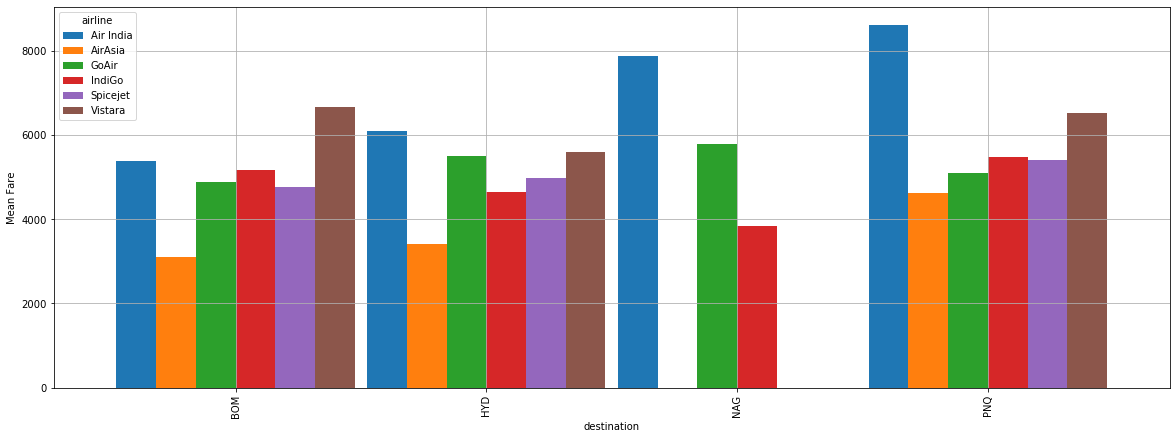

In [20]:
flight.groupby(['destination','airline'])['Total_fare'].mean().unstack(level = 1).plot(layout = (100,10),kind = 'bar',figsize = (20,7),grid = True,width = 0.95)
plt.ylabel('Mean Fare')
plt.plot()

### Going by mean of fares to each location we observe
<ol>
    <li><b>AirAsia</b> offers the minimum avg fare for to all the location where it flies to.
    <li><b>Nagpur</b> as a destination is only offered by 3 airline{Indigo,Air India and GoAir}.
    <li><b>Air India</b> and <b>Vistara</b> are relatively more expensive than other three.Except for Mumbai ,<b>Air India</b> is the most expensive carrier
</ol>
<p>This is a very rough estimates and there might be some hidden factors which can't be found in this graph.Let's us study this data frame in a bit more detail by also considering the # of stops 
        

[]

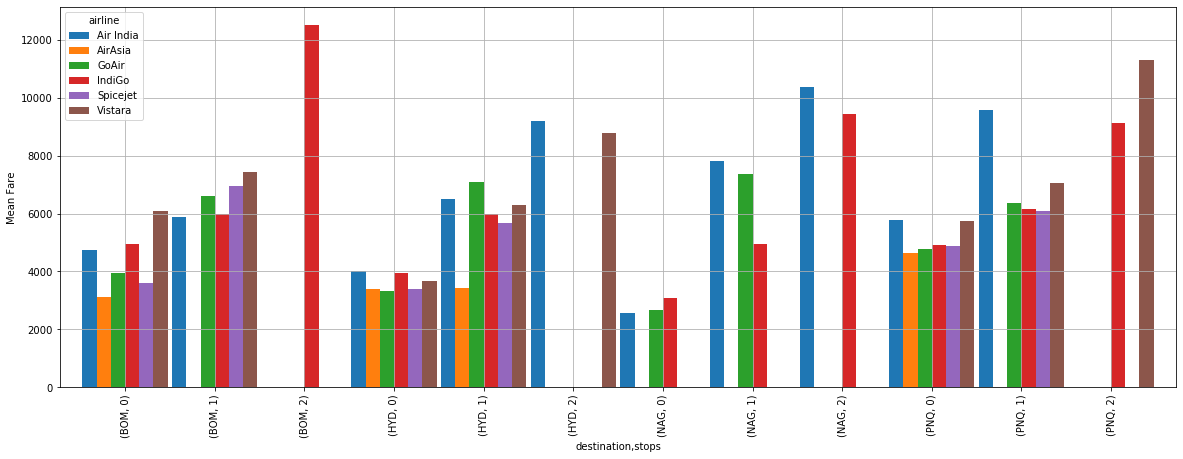

In [21]:
flight.groupby(['destination','airline','stops'])['Total_fare'].mean().unstack(level = 1).plot(layout = (100,10),kind = 'bar',figsize = (20,7),grid = True,width = 0.95)
plt.ylabel('Mean Fare')
plt.plot()

## Observation
<ol>
    <li><b>Mumbai</b>(which is a type I airport) has only one airline which provides a two stop flight.
    <li>Generally Two stop flights are significantly expensive than one and non stop.
        <ul><li>But in Nagpur we observe that even the cost of one stop flight are significantly high as compared to non-stop.</ul>
     <li><b>Air India</b> still seems to be the most expensive carrier
     <li><b>Air Asia</b> still seems to be the least expensive carrier

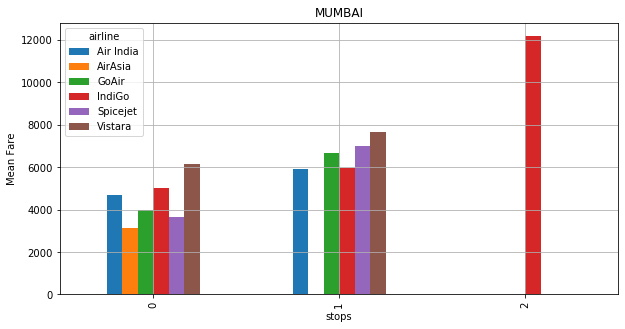

airline    stops
Air India  0         4680.894826
           1         5915.432143
AirAsia    0         3152.290447
GoAir      0         4000.900593
           1         6657.027248
IndiGo     0         5013.670849
           1         5971.353470
           2        12195.200000
Spicejet   0         3657.046524
           1         6983.392543
Vistara    0         6124.573429
           1         7665.692975
Name: Total_fare, dtype: float64


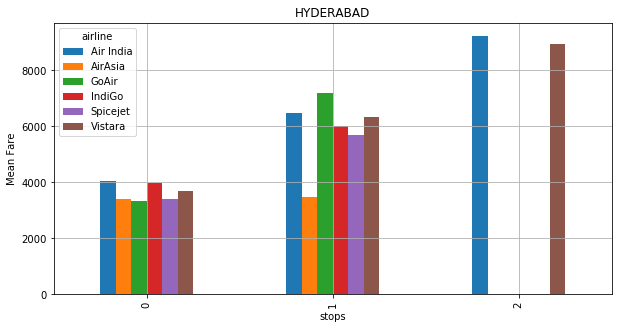

airline    stops
Air India  0        4028.714450
           1        6456.380771
           2        9230.350679
AirAsia    0        3403.896753
           1        3477.343327
GoAir      0        3345.069084
           1        7189.514914
IndiGo     0        3985.097098
           1        6010.432863
Spicejet   0        3393.601119
           1        5691.985172
Vistara    0        3682.160211
           1        6324.390086
           2        8929.213542
Name: Total_fare, dtype: float64


In [32]:
Bom.groupby(['airline','stops']).Total_fare.mean().unstack(level = 0).plot(kind = 'bar',figsize = (10,5),grid = True,title='MUMBAI')
plt.ylabel('Mean Fare')
plt.show()
print(Bom.groupby(['airline','stops']).Total_fare.mean())
Hyd.groupby(['airline','stops']).Total_fare.mean().unstack(level = 0).plot(kind = 'bar',figsize = (10,5),grid = True,title='HYDERABAD')
plt.ylabel('Mean Fare')
plt.show()
print(Hyd.groupby(['airline','stops']).Total_fare.mean())

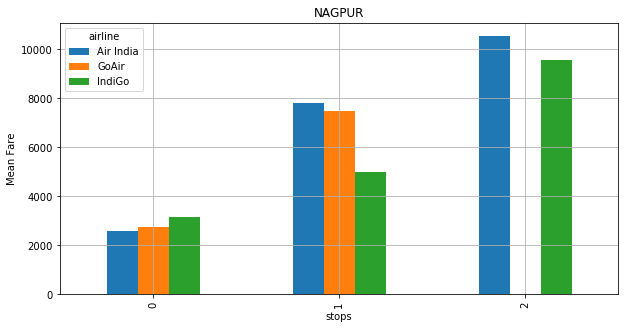

airline    stops
Air India  0         2584.968930
           1         7818.651051
           2        10557.607147
GoAir      0         2740.293208
           1         7460.756985
IndiGo     0         3164.974276
           1         5006.992430
           2         9564.659748
Name: Total_fare, dtype: float64


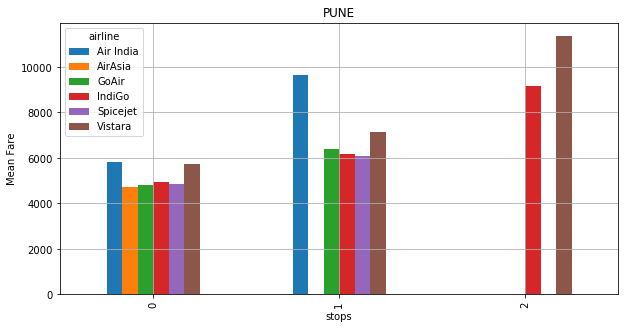

airline    stops
Air India  0         5810.976357
           1         9631.700796
AirAsia    0         4706.097523
GoAir      0         4816.580886
           1         6379.977509
IndiGo     0         4939.395275
           1         6187.631731
           2         9160.423770
Spicejet   0         4839.812651
           1         6073.508004
Vistara    0         5751.201694
           1         7132.255538
           2        11380.839599
Name: Total_fare, dtype: float64


In [31]:
Nag.groupby(['airline','stops']).Total_fare.mean().unstack(level = 0).plot(kind = 'bar',figsize = (10,5),grid = True,title='NAGPUR')
plt.ylabel('Mean Fare')
plt.show()
print(Nag.groupby(['airline','stops']).Total_fare.mean())
Pnq.groupby(['airline','stops']).Total_fare.mean().unstack(level = 0).plot(kind = 'bar',figsize = (10,5),grid = True,title='PUNE',)
plt.ylabel('Mean Fare')
plt.show()
print(Pnq.groupby(['airline','stops']).Total_fare.mean())

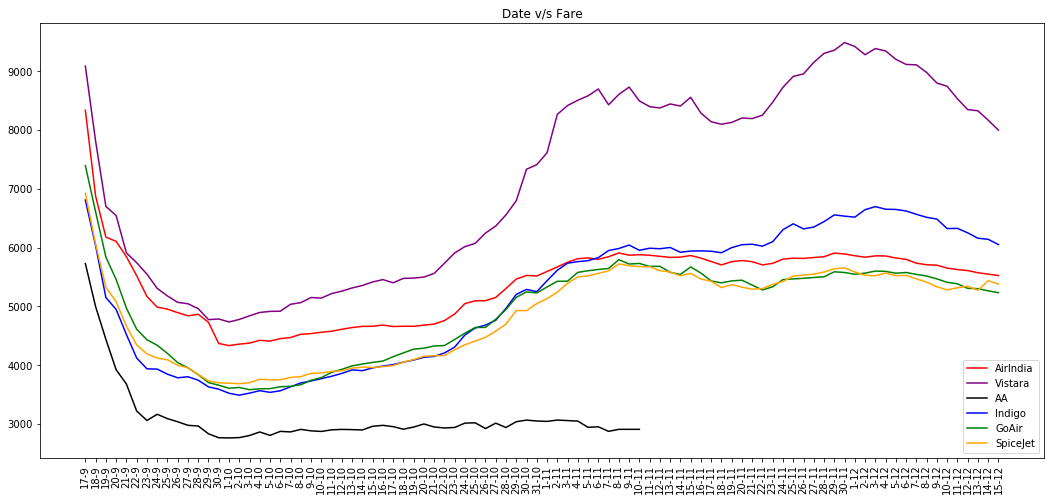

In [47]:
d1,f1 = Avgprice_var(AIBom,90,5)
d2,f2 = Avgprice_var(VBom,90,5)
d3,f3 =Avgprice_var(AABom,55,5)
d4,f4 =Avgprice_var(INBom,90,5)
d5,f5 =Avgprice_var(GABom,90,5)
d6,f6 =Avgprice_var(SJBom,90,5)
plt.figure(figsize=(18,8))
plt.plot(d1,f1,'red')
plt.plot(d2,f2,'purple')
plt.plot(d3,f3,'black')
plt.plot(d4,f4,'blue')
plt.plot(d5,f5,'green')
plt.plot(d6,f6,'orange')

plt.title("Date v/s Fare")
plt.xticks(rotation=90)
plt.legend(['AirIndia','Vistara','AA','Indigo','GoAir','SpiceJet'])
plt.show()

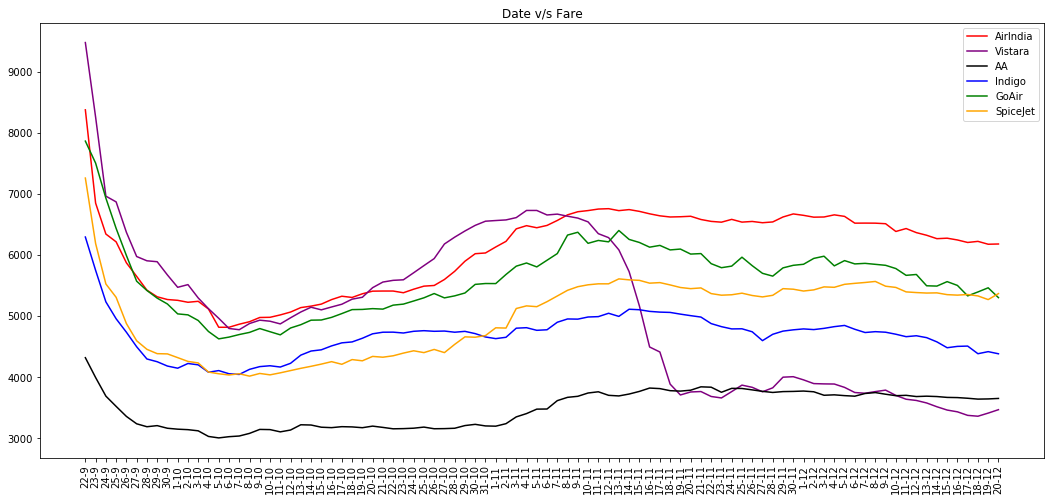

In [46]:
d1,f1 = Avgprice_var(AIHyd,90)
d2,f2 = Avgprice_var(VHyd,90)
d3,f3 =Avgprice_var(AAHyd,90)
d4,f4 =Avgprice_var(INHyd,90)
d5,f5 =Avgprice_var(GAHyd,90)
d6,f6 =Avgprice_var(SJHyd,90)
plt.figure(figsize=(18,8))
plt.plot(d1,f1,'red')
plt.plot(d2,f2,'purple')
plt.plot(d3,f3,'black')
plt.plot(d4,f4,'blue')
plt.plot(d5,f5,'green')
plt.plot(d6,f6,'orange')

plt.title("Date v/s Fare")
plt.xticks(rotation=90)
plt.legend(['AirIndia','Vistara','AA','Indigo','GoAir','SpiceJet'])
plt.show()

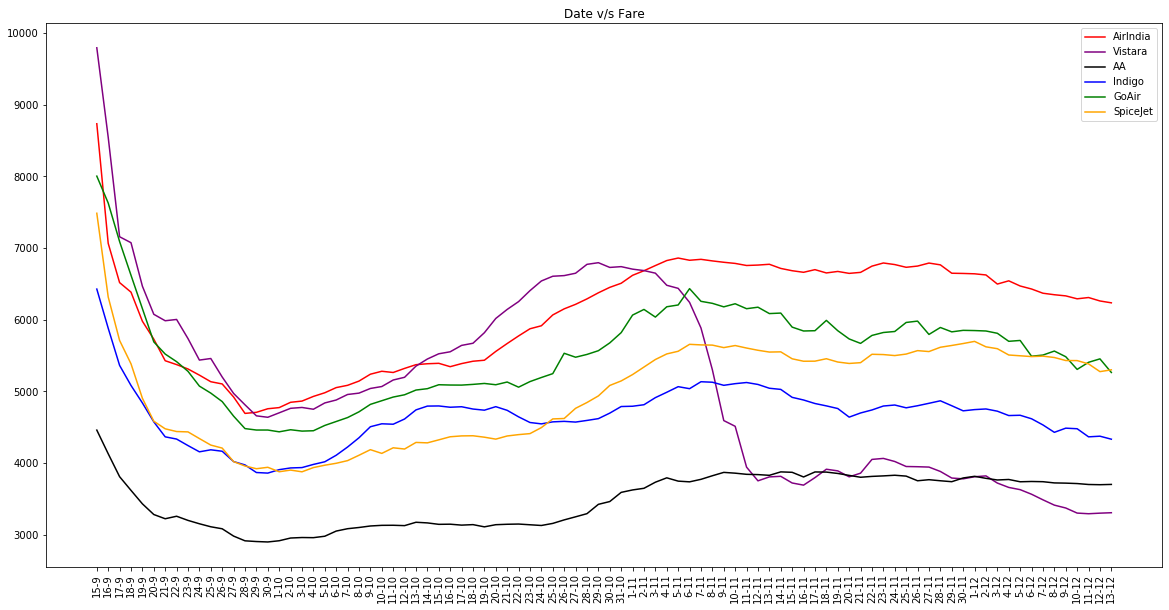

In [47]:
d1,f1 = Avgprice_var(AIHyd,90)
d2,f2 = Avgprice_var(VHyd,90)
d3,f3 =Avgprice_var(AAHyd,90)
d4,f4 =Avgprice_var(INHyd,90)
d5,f5 =Avgprice_var(GAHyd,90)
d6,f6 =Avgprice_var(SJHyd,90)
plt.figure(figsize=(18,8))
plt.plot(d1,f1,'red')
plt.plot(d2,f2,'purple')
plt.plot(d3,f3,'black')
plt.plot(d4,f4,'blue')
plt.plot(d5,f5,'green')
plt.plot(d6,f6,'orange')

plt.title("Date v/s Fare")
plt.xticks(rotation=90)
plt.legend(['AirIndia','Vistara','AA','Indigo','GoAir','SpiceJet'])
plt.show()

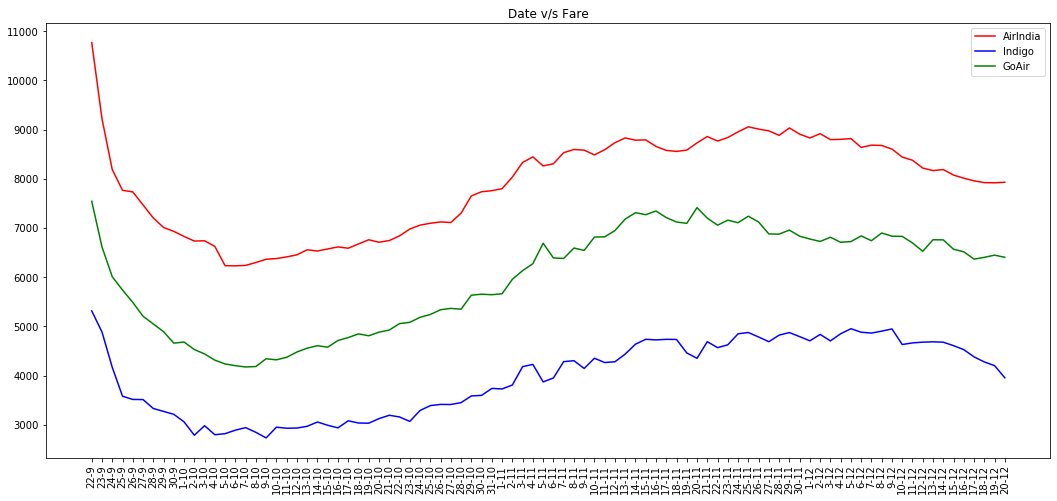

In [45]:
d1,f1 = Avgprice_var(AINag,90)
#d2,f2 = Avgprice_var(VNag,90)
#d3,f3 =Avgprice_var(AANag,55)
d4,f4 =Avgprice_var(INNag,90)
d5,f5 =Avgprice_var(GANag,90)
#d6,f6 =Avgprice_var(SJNag,90)
plt.figure(figsize=(18,8))
plt.plot(d1,f1,'red')
#plt.plot(d2,f2,'purple')
#plt.plot(d3,f3,'black')
plt.plot(d4,f4,'blue')
plt.plot(d5,f5,'green')
#plt.plot(d6,f6,'orange')

plt.title("Date v/s Fare")
plt.xticks(rotation=90)
plt.legend(['AirIndia','Indigo','GoAir'])
plt.show()

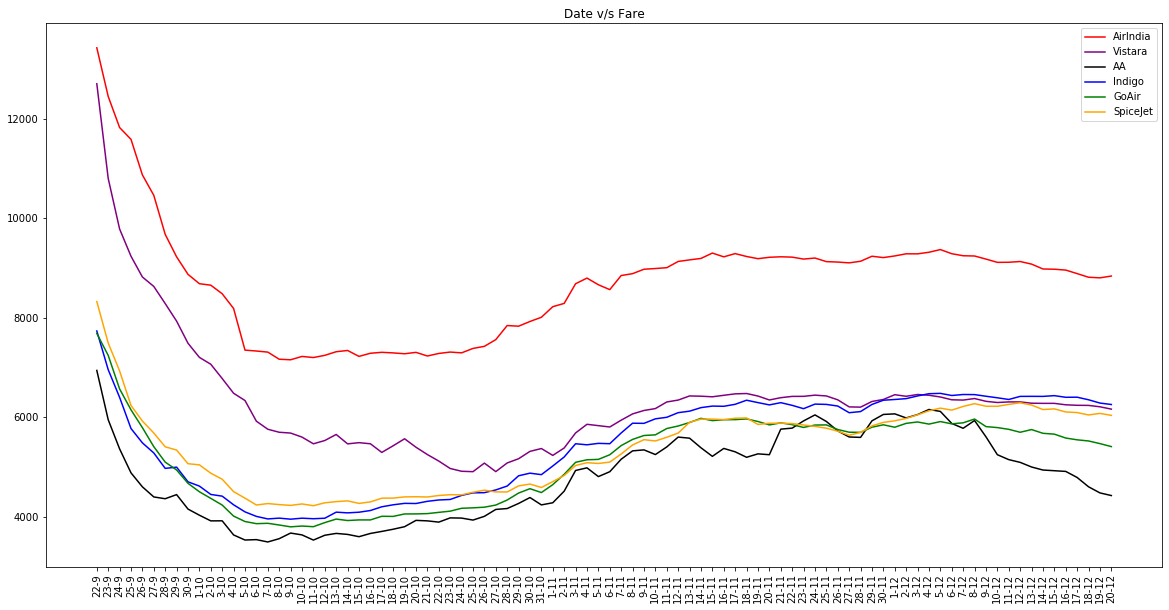

In [30]:
d1,f1 = Avgprice_var(AIPnq,90)
d2,f2 = Avgprice_var(VPnq,90)
d3,f3 =Avgprice_var(AAPnq,90)
d4,f4 =Avgprice_var(INPnq,90)
d5,f5 =Avgprice_var(GAPnq,90)
d6,f6 =Avgprice_var(SJPnq,90)
plt.figure(figsize=(20,10))
plt.plot(d1,f1,'red')
plt.plot(d2,f2,'purple')
plt.plot(d3,f3,'black')
plt.plot(d4,f4,'blue')
plt.plot(d5,f5,'green')
plt.plot(d6,f6,'orange')

plt.title("Date v/s Fare")
plt.xticks(rotation=90)
plt.legend(['AirIndia','Vistara','AA','Indigo','GoAir','SpiceJet'])
plt.show()

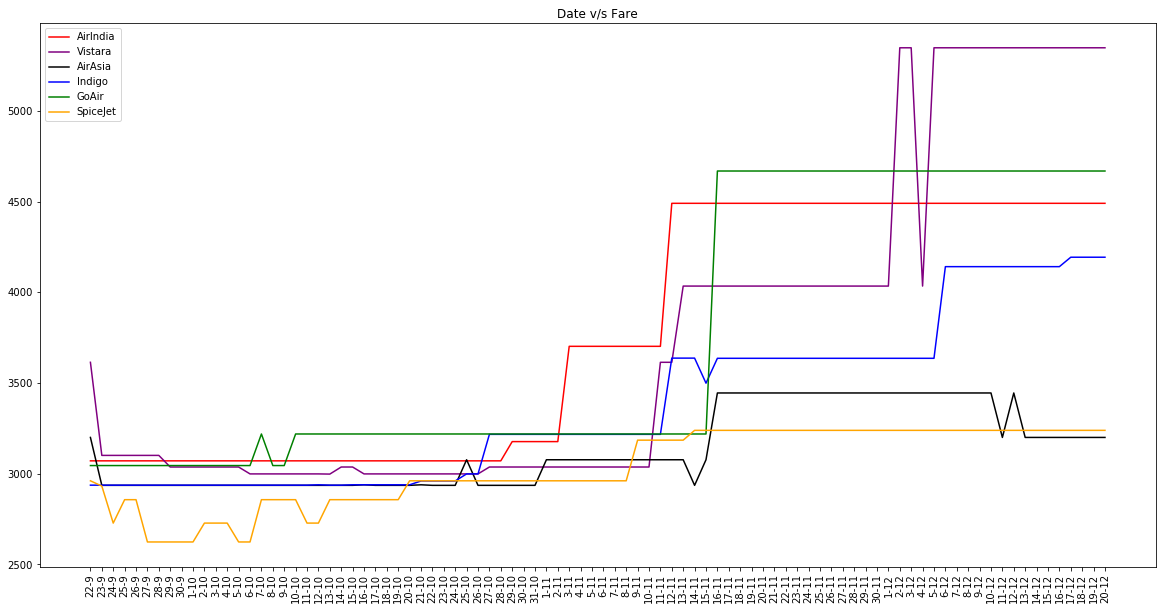

In [29]:
d1,f1 = Minprice_var(AIPnq,90)
d2,f2 = Minprice_var(VPnq,90)
d3,f3 =Minprice_var(AAPnq,90)
d4,f4 =Minprice_var(INPnq,90)
d5,f5 =Minprice_var(GAPnq,90)
d6,f6 =Minprice_var(SJPnq,90)
plt.figure(figsize=(20,10))
plt.plot(d1,f1,'red')
plt.plot(d2,f2,'purple')
plt.plot(d3,f3,'black')
plt.plot(d4,f4,'blue')
plt.plot(d5,f5,'green')
plt.plot(d6,f6,'orange')

plt.title("Date v/s Fare")
plt.xticks(rotation=90)
plt.legend(['AirIndia','Vistara','AirAsia','Indigo','GoAir','SpiceJet'])
plt.show()

In [53]:
flight.groupby(['airline','stops']).count()

Search_Date  Departure_Date  Days_fly    origin  \
airline       stops                                                    
Air India     0          90827.0         90827.0   90827.0   90827.0   
              1         303338.0        303338.0  303338.0  303338.0   
              2           9481.0          9481.0    9481.0    9481.0   
AirAsia       0          30245.0         30245.0   30245.0   30245.0   
              1           2068.0          2068.0    2068.0    2068.0   
              2              NaN             NaN       NaN       NaN   
AirAsia India 0              NaN             NaN       NaN       NaN   
              1              NaN             NaN       NaN       NaN   
              2              NaN             NaN       NaN       NaN   
GoAir         0          75294.0         75294.0   75294.0   75294.0   
              1          56867.0         56867.0   56867.0   56867.0   
              2              NaN             NaN       NaN       NaN   
IndiGo        0         173484.0        173484.0  173484.0  173484.0   
              1          68234.0         68234.0   68234.0   68234.0   
              2           2197.0          2197.0    2197.0    2197.0   
Spicejet      0          58031.0         58031.0   58031.0   58031.0   
              1          49866.0         49866.0   49866.0   49866.0   
              2              NaN             NaN       NaN       NaN   
Vistara       0          82243.0         82243.0   82243.0   82243.0   
              1          92306.0         92306.0   92306.0   92306.0   
              2           1788.0          1788.0    1788.0    1788.0   

                     destination   deptime   arrtime  flightno  Total_fare  \
airline       stops                                                          
Air India     0          90827.0   90827.0   90827.0   90827.0     90827.0   
              1         303338.0  303338.0  303338.0  303338.0    303338.0   
              2           9481.0    9481.0    9481.0    9481.0      9481.0   
AirAsia       0          30245.0   30245.0   30245.0   30245.0     30245.0   
              1           2068.0    2068.0    2068.0    2068.0      2068.0   
              2              NaN       NaN       NaN       NaN         NaN   
AirAsia India 0              NaN       NaN       NaN       NaN         NaN   
              1              NaN       NaN       NaN       NaN         NaN   
              2              NaN       NaN       NaN       NaN         NaN   
GoAir         0          75294.0   75294.0   75294.0   75294.0     75294.0   
              1          56867.0   56867.0   56867.0   56867.0     56867.0   
              2              NaN       NaN       NaN       NaN         NaN   
IndiGo        0         173484.0  173484.0  173484.0  173484.0    173484.0   
              1          68234.0   68234.0   68234.0   68234.0     68234.0   
              2           2197.0    2197.0    2197.0    2197.0      2197.0   
Spicejet      0          58031.0   58031.0   58031.0   58031.0     58031.0   
              1          49866.0   49866.0   49866.0   49866.0     49866.0   
              2              NaN       NaN       NaN       NaN         NaN   
Vistara       0          82243.0   82243.0   82243.0   82243.0     82243.0   
              1          92306.0   92306.0   92306.0   92306.0     92306.0   
              2           1788.0    1788.0    1788.0    1788.0      1788.0   

                     seats_avail  seatingclass  duration     stop1   stop2  \
airline       stops                                                          
Air India     0          90827.0       90827.0   90827.0       0.0     0.0   
              1         303338.0      303338.0  303338.0  303338.0     0.0   
              2           9481.0        9481.0    9481.0    9481.0  9481.0   
AirAsia       0          30245.0       30245.0   30245.0       0.0     0.0   
              1           2068.0        2068.0    2068.0    2068.0     0.0   
              2        

In [55]:
AirIndia.loc[AirIndia.stops == 1]

,Search_Date,Departure_Date,Days_fly,origin,destination,deptime,arrtime,flightno,airline,Total_fare,seats_avail,seatingclass,duration,stops,stop1,stop2,Day_Name,Month
0,2019-08-07,2019-08-07,0,DEL,1,16:40,4:40,10,Air India,5771,9,E,720,1,AMD,NaN,2,8
1,2019-08-07,2019-08-08,1,DEL,1,16:40,6:00,10,Air India,5771,9,E,800,1,AMD,NaN,3,8
2,2019-08-07,2019-08-09,2,DEL,1,16:40,4:40,10,Air India,6821,9,E,720,1,AMD,NaN,4,8
3,2019-08-07,2019-08-09,2,DEL,1,16:40,8:35,10,Air India,7451,9,E,955,1,AMD,NaN,4,8
4,2019-08-07,2019-08-10,3,DEL,1,16:40,4:40,10,Air India,5666,9,E,720,1,AMD,NaN,5,8
5,2019-08-07,2019-08-10,3,DEL,1,16:40,8:35,10,Air India,5981,9,E,955,1,AMD,NaN,5,8
6,2019-08-07,2019-08-11,4,DEL,1,16:40,4:40,10,Air India,5666,9,E,720,1,AMD,NaN,6,8
7,2019-08-07,2019-08-11,4,DEL,1,16:40,8:35,10,Air India,5876,9,E,955,1,AMD,NaN,6,8
8,2019-08-07,2019-08-12,5,DEL,1,16:40,8:35,10,Air India,5141,9999,E,955,1,AMD,NaN,0,8
9,2019-08-07,2019-08-12,5,DEL,1,16:40,4:40,10,Air India,5141,9999,E,720,1,AMD,NaN,0,8


In [7]:
flight

,Search_Date,Departure_Date,Days_fly,origin,destination,deptime,arrtime,flightno,airline,Total_fare,seats_avail,seatingclass,duration,stops,stop1,stop2,Day_Name,Month,tcat
0,2019-08-07,2019-08-07,0,DEL,1,16:40,4:40,10,Air India,5771,9,E,720,1,AMD,NaN,2,8,4
1,2019-08-07,2019-08-08,1,DEL,1,16:40,6:00,10,Air India,5771,9,E,800,1,AMD,NaN,3,8,4
2,2019-08-07,2019-08-09,2,DEL,1,16:40,4:40,10,Air India,6821,9,E,720,1,AMD,NaN,4,8,4
3,2019-08-07,2019-08-09,2,DEL,1,16:40,8:35,10,Air India,7451,9,E,955,1,AMD,NaN,4,8,4
4,2019-08-07,2019-08-10,3,DEL,1,16:40,4:40,10,Air India,5666,9,E,720,1,AMD,NaN,5,8,4
5,2019-08-07,2019-08-10,3,DEL,1,16:40,8:35,10,Air India,5981,9,E,955,1,AMD,NaN,5,8,4
6,2019-08-07,2019-08-11,4,DEL,1,16:40,4:40,10,Air India,5666,9,E,720,1,AMD,NaN,6,8,4
7,2019-08-07,2019-08-11,4,DEL,1,16:40,8:35,10,Air India,5876,9,E,955,1,AMD,NaN,6,8,4
8,2019-08-07,2019-08-12,5,DEL,1,16:40,8:35,10,Air India,5141,9999,E,955,1,AMD,NaN,0,8,4
9,2019-08-07,2019-08-12,5,DEL,1,16:40,4:40,10,Air India,5141,9999,E,720,1,AMD,NaN,0,8,4
